## Scipy preliminary
- 이 강의는 scipy lecture note의 scipy 부분을 강의하기 전에 필요하다.
- 기본적인 calculus를 다룬다.
- https://pythonnumericalmethods.berkeley.edu/notebooks/Index.html 를 기초로 만들었다.
- 다루는 theme은 root finding, differenciation, integration 이다.
- 목적
    - scipy lecture note의 scipy는 여러분야의 introduction 이다.
    - 그러므로 basic scipy에 대한 이해가 필요하다.

---
### 근 찾기
- 근을 찾는 영역을 잘게 나누어 함수값이 0에 가까운 것을 찾는다 (resolution이 늘어날 수록 array가 커진다.)
- 기본적인 방법들
    - bisection method
    - Newton-Raphson method
    
##### **Bisection Method**  
|그림 1. 중간값의 정리|그림 2. Bisection Method|
|:--:|:--:|
|<img src='intermediate-value-theorem.png' width='300px'>|<img src='Bisection-Method.png' width='300px'> |
 
- 중간값의 정리: 
    - $f(x)$가 closed interval $[a,b]$에서 연속이고 
    - $sign\left( f(a)\right)\ne sign\left( f(a)\right)$ 이면 
    - $f(c)=0$을 만족하는 $c$가 open interval $(a,b)$안에 존재한다  

- Bisection Method
    - $a,b$의 중간값을 $m$이라고 하면
    - $f(m)$이 tolerance보다 작으면 $m$이 해이다.
    - 그렇지 않으면 $f(a), f(b)$ 중에서 $f(m)$ 부호가 다른 것의 $x$ 값과 $m$을 사용하여 이 과정을 반복한다.

In [ ]:
import numpy as np

def my_bisection(f, a, b, tol): 
    # approximates a root, R, of f bounded 
    # by a and b to within tolerance 
    # | f(m) | < tol with m the midpoint 
    # between a and b Recursive implementation
    
    # check if a and b bound a root
    if np.sign(f(a)) == np.sign(f(b)):
        print("interval [a,b] 에 근이 있는 지 알 수 없다.")
        return False
        
    # get midpoint
    m = (a + b)/2
    
    if np.abs(f(m)) < tol:
        # stopping condition, report m as root
        return m
    elif np.sign(f(a)) == np.sign(f(m)):
        # case where m is an improvement on a. 
        # Make recursive call with a = m
        return my_bisection(f, m, b, tol)
    elif np.sign(f(b)) == np.sign(f(m)):
        # case where m is an improvement on b. 
        # Make recursive call with b = m
        return my_bisection(f, a, m, tol)

In [ ]:
f = lambda x: x**2 - 2

r1 = my_bisection(f, 0, 2, 0.1)
print("r1 =", r1)
r01 = my_bisection(f, 0, 2, 0.01)
print("r01 =", r01)

print("f(r1) =", f(r1))
print("f(r01) =", f(r01))

r1 = 1.4375
r01 = 1.4140625
f(r1) = 0.06640625
f(r01) = -0.00042724609375


#### **Newton-Raphson method**

<img src='Newton-step.png' width='300px'>

- $x_0$가 근 $x_r$의 추측값이라고 하자
- $x_0$가 $x_r$하고 매우 가까운 추측값이라고 하면 $f(x)$는 $x_0$에서 $x_r$ 까지 거의 직선으로 움직일 것이다.
- 즉 $f'(x_0)$는 $x_0$하고 가까운 임의의 $x$를 이용하여 다음과 같이 근사할 수 있다.
$$ f'(x_0) \approx \frac{f(x)-f(x_0)}{x-x_0}$$ 
- 그러므로 $f(x)=0$ 을 만족시키는 $x_0$ 근처의 $x$ 값을 $x_1$ 이라고 하면 $f(x_1)=0$ 이므로
- $ x_1=x_0-\frac{f(x_0)}{f'(x_0)}$ 로 구할 수 있고,
- 이 $x_1$은 근 $x_r$에 보다 가까울 것이다. 
- 그러므로 다음과 같은 **Newton step**은 점점 근 $x_r$로 접근할 것이다.
$$x_i = x_{i-1} - \frac{f(x_{i-1})}{f'(x_{i-1})}$$
- **Newton-Raphson** method 는 상기 **Newton step** 을 error가 허용치 (tolerance) 이내에 들어올 때까지 반복하는 것이다.

In [ ]:
import numpy as np

f = lambda x: x**2 - 2
f_prime = lambda x: 2*x

x0=1.4
newton_raphson = x0 - (f(x0))/(f_prime(x0))

print("newton_raphson =", newton_raphson)
print("sqrt(2) =", np.sqrt(2))

newton_raphson = 1.4142857142857144
sqrt(2) = 1.4142135623730951


In [ ]:
def my_newton(f, df, x0, tol):
    # output is an estimation of the root of f 
    # using the Newton Raphson method
    # recursive implementation
    if abs(f(x0)) < tol:
        return x0
    else:
        return my_newton(f, df, x0 - f(x0)/df(x0), tol)

In [ ]:
estimate = my_newton(f, f_prime, 1.5, 1e-6)
print("estimate =", estimate)
print("sqrt(2) =", np.sqrt(2))

estimate = 1.4142135623746899
sqrt(2) = 1.4142135623730951


#### **Scipy Root Finding**
- scipy.optimize.fsolve
- scipy.optimize.root

In [ ]:
from scipy.optimize import fsolve, root

In [ ]:
f = lambda x: x**3-100*x**2-x+100

res1 = fsolve(f, [2, 80])
res2 = root(f,[2,80])
print('---fsolve:\n',res1)
print('---root:\n',res2)

---fsolve:
 [  1. 100.]
---root:
     fjac: array([[-1.00000000e+00, -2.47477349e-07],
       [ 2.47477349e-07, -1.00000000e+00]])
     fun: array([-2.95294456e-09,  0.00000000e+00])
 message: 'The solution converged.'
    nfev: 13
     qtf: array([ 1.90468530e-05, -5.84700398e-07])
       r: array([ 1.98030992e+02, -4.64255706e-01, -9.99926911e+03])
  status: 1
 success: True
       x: array([  1., 100.])


---
### 미분

- $x=a$ 에서의 $f(x)$의 미분의 정의
>$f'(a)=\underset{x \to a}{lim} \frac{f(x) - f(a)}{x - a}$
- 이산구조에서의 미분 (Finite difference)
> - forward difference
>>$f'(x_j)=\frac{f(x_{j+1})−f(x_j)}{x_{j+1}−x_j}$
> - backward difference
>>$f'(x_j)=\frac{f(x_j)−f(x_{j-1})}{x_j−x_{j-1}}$
> - central difference
>>$f'(x_j)=\frac{f(x_{j+1})−f(x_{j-1})}{x_{j+1}−x_{j-1}}$
  
<img src='Finite-difference.png' width='800px'>


---
### 적분
<img src='illustration_integral.png' width='500px'><br>

- Riemann's integral
- $x_{i+1}-x_i=h$ 이라면

> 왼쪽 end point
>> $$\int_a^b f(x)dx \approx \sum_{i=0}^{n-1} hf(x_i)$$ 
>오른 쪽 end point
>> $$\int_a^b f(x)dx \approx \sum_{i=1}^{n} hf(x_i)$$ 

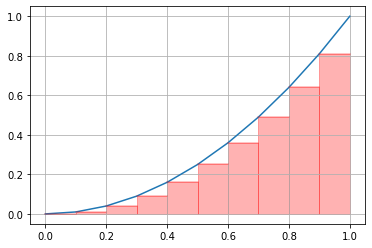

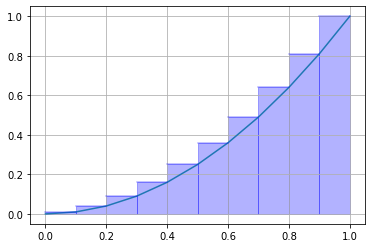

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
nbins = 10 #bin의 개수
x=np.linspace(0,1,nbins+1)
h=x[1]-x[0] #bin의 폭

f=x**2
# lower bound
plt.plot(x,f)
for i in range(nbins):
    plt.plot([x[i],x[i+1]],[f[i],f[i]],'r',alpha=0.3)
    plt.fill_between([x[i],x[i+1]],[f[i],f[i]],color='r',alpha=0.3)
plt.grid()
plt.figure()
# upper bound
plt.plot(x,f)
for i in range(nbins):
    plt.plot([x[i],x[i+1]],[f[i+1],f[i+1]],'b',alpha=0.3)
    plt.fill_between([x[i],x[i+1]],[f[i+1],f[i+1]],color='b',alpha=0.3)
plt.grid()

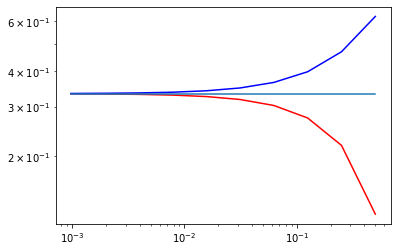

In [ ]:
# true integration value x^2 -> x^3/3 (0,1) -> 1/3
from logging import StringTemplateStyle


nbins = 1
iterations = 10
step_size = [] 
lsum = [] 
usum = []
for iter in range(iterations):
    nbins *= 2
    x = np.linspace(0,1,nbins+1)
    y = x**2
    width=x[1]-x[0]
    step_size.append(width)
    lsum.append(width*np.sum(y[:-1]))
    usum.append(width*np.sum(y[1:]))
plt.loglog(step_size,lsum,'r')
plt.loglog(step_size,usum,'b')
plt.loglog(step_size,1/3*np.ones(len(step_size)))
    

---
#### 실습
$$\int_{0}^{\frac{\pi}{2}} sin \theta d\theta = \frac{1}{2}$$

1. $0\le x\le \frac{\pi}{2}$를 5등분했을 때 upper bound와 lower bound를 그려라  
2. Riemann integral의 upper bound와 lower bound의 $h$ 에 따른 변화를 관찰하여라